<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Regresión

Ejemplo de regresión multilineal<br>
v2.0

### Objetivo:
*   Comprender el funcionamiento e implementación de la regresión multilineal.


In [1]:
#Librerias a implementar
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Recolectar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle">

### Código de descarga del dataset

In [ ]:
if os.access('propiedades.csv', os.F_OK) is False:
    if platform.system() == 'Windows':
        !curl https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/propiedades.csv > propiedades.csv
    else:
        !wget propiedades.csv https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/propiedades.csv

# Procesar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle">

In [2]:
# Una vez descargado el archivo en Colab.
# Leerlo con Pandas y el método read_csv
# Una vez extraida toda la información se almacena en df
# A partir de df y el método describe(), mostrará la descripción estadistica básica del archivo que se guardará en des
# Crear una fila nueva llamada Nan en el DataFrame  des,
# que indica la cantidad de datos tipo Nan que tiene cada columna.
# Para crear una nueva fila, se utilizará el operador loc, donde se indica el nombre
# de la nueva fila y con que valores se completará.
# La información será de los datos faltantes df.isna().sum()
# Crear una fila nueva llamada %Nan en el DataFrame des,
# Esta fila se completará con los porcentajes de Nan encontrados en cada columna.
df = pd.read_csv("propiedades.csv")
des = df.describe()
des.loc['Nan'] = df.isna().sum()
des.loc['%Nan'] = (df.isna().mean())*100
des

,Unnamed: 0.1,Unnamed: 0,latitud,longitud,precio,m2,ambientes
count,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1048.000000,1044.000000
mean,524.500000,524.500000,-34.526132,-58.423896,103803.789524,62.232777,2.143678
std,303.253195,303.253195,2.549434,2.319076,46740.374496,56.281333,1.339870
min,0.000000,0.000000,-38.505290,-120.740135,27.000000,0.000000,0.000000
25%,262.250000,262.250000,-34.608908,-58.448632,95744.500000,35.000000,1.000000
50%,524.500000,524.500000,-34.594705,-58.423578,102200.000000,45.000000,2.000000
75%,786.750000,786.750000,-34.578902,-58.395060,113000.000000,70.000000,3.000000
max,1049.000000,1049.000000,47.751076,-34.588875,820000.000000,700.000000,18.000000
Nan,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,6.000000
%Nan,0.000000,0.000000,0.000000,0.000000,0.000000,0.190476,0.571429


In [3]:
# Muestra las 5 primeras filas del DataFrame df
df.head()

,Unnamed: 0.1,Unnamed: 0,fecha,latitud,longitud,url,titulo,tipo_propiedad,precio,moneda,m2,ambientes
0,0,0,2020_10_11,-34.611270,-58.36378,https://departamento.mercadolibre.com.ar/MLA-7...,Departamento-alquiler - Puerto Madero-situar,Departamento,2900.0,USD,192.0,4.0
1,1,1,2020_10_11,-34.589848,-58.50942,https://departamento.mercadolibre.com.ar/MLA-7...,Oportunidad! Monoambiente A Estrenar - Alquile...,Departamento,50.0,USD,38.0,1.0
2,2,2,2020_10_11,-34.605970,-34.60597,https://departamento.mercadolibre.com.ar/MLA-8...,Alquiler Temporario De Lujo 4/p Hospital Itali...,Departamento,101866.0,ARS,57.0,1.0
3,3,3,2020_10_11,-34.590656,-58.44873,https://departamento.mercadolibre.com.ar/MLA-8...,Excelente Departamento 3 Ambientes (2 Cuartos)...,Departamento,105000.0,ARS,60.0,3.0
4,4,4,2020_10_11,-34.624084,-58.38989,https://departamento.mercadolibre.com.ar/MLA-8...,Departamentos Alquil Temporario Centro Cap Fed...,Departamento,102100.0,ARS,64.0,3.0


In [4]:
# Eliminar todas las filas de la tabla las cuales el campo "m2" o "ambientes" se encuentre 
#con datos faltantes
# Se hace una copia

df_clean = df.copy()

# Para eliminar los datos faltantes, se implementará el método dropna, indicando 
# La columna a borrar
df_clean.dropna(subset=['m2'], inplace=True)
df_clean.dropna(subset=['ambientes'], inplace=True)

# Otra manera de obtener el mismo resultado:
#df_clean = df[df['m2'].notna()]
#df_clean = df_clean[df_clean['ambientes'].notna()]

In [5]:
# ¿Cuántos datos quedaron para analizar?
# (filas, columnas)
df_clean.shape

(1044, 12)

## Fin de la limpieza
Se finalizó la limpieza sacando aquellas filas que no eran de interes, se puede observar que la cantidad de filas hasta el momento es menor a la cantidad de filas con la que se comnezó el análisis

In [6]:
print('Cantidad de datos en observacion:', df_clean.shape[0])

Cantidad de datos en observacion: 1044


# Explorar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle">

In [7]:
# Muestra las 5 primeras filas del DataFrame df_clean
df_clean.head()

,Unnamed: 0.1,Unnamed: 0,fecha,latitud,longitud,url,titulo,tipo_propiedad,precio,moneda,m2,ambientes
0,0,0,2020_10_11,-34.611270,-58.36378,https://departamento.mercadolibre.com.ar/MLA-7...,Departamento-alquiler - Puerto Madero-situar,Departamento,2900.0,USD,192.0,4.0
1,1,1,2020_10_11,-34.589848,-58.50942,https://departamento.mercadolibre.com.ar/MLA-7...,Oportunidad! Monoambiente A Estrenar - Alquile...,Departamento,50.0,USD,38.0,1.0
2,2,2,2020_10_11,-34.605970,-34.60597,https://departamento.mercadolibre.com.ar/MLA-8...,Alquiler Temporario De Lujo 4/p Hospital Itali...,Departamento,101866.0,ARS,57.0,1.0
3,3,3,2020_10_11,-34.590656,-58.44873,https://departamento.mercadolibre.com.ar/MLA-8...,Excelente Departamento 3 Ambientes (2 Cuartos)...,Departamento,105000.0,ARS,60.0,3.0
4,4,4,2020_10_11,-34.624084,-58.38989,https://departamento.mercadolibre.com.ar/MLA-8...,Departamentos Alquil Temporario Centro Cap Fed...,Departamento,102100.0,ARS,64.0,3.0


Se puede observar que hay alquileres en dolares, solo nos quedaremos con aquellos alquileres en pesos

In [8]:
# Filtramos el dataframe, solos nos quedamos con los alquileres en pesos
# df_ars, almacena el DataFrame filtrado
# Para filtrad el DataFrame llamado df_clean se debe acceder a el con corchetes
# Entre los corcheter especificar la condición de filtrado 
# --> Accede a la columna moneda df_clean['moneda']
# Y para cada valor va a comparar si es igual a 'ARS'
df_ars = df_clean[df_clean['moneda'] == 'ARS']

# shape informa de la cantidad de filas y columnas y en la 
# ubicación 0 está la información de las filas.
print('Cantidad de datos en observacion:', df_ars.shape[0])

Cantidad de datos en observacion: 928


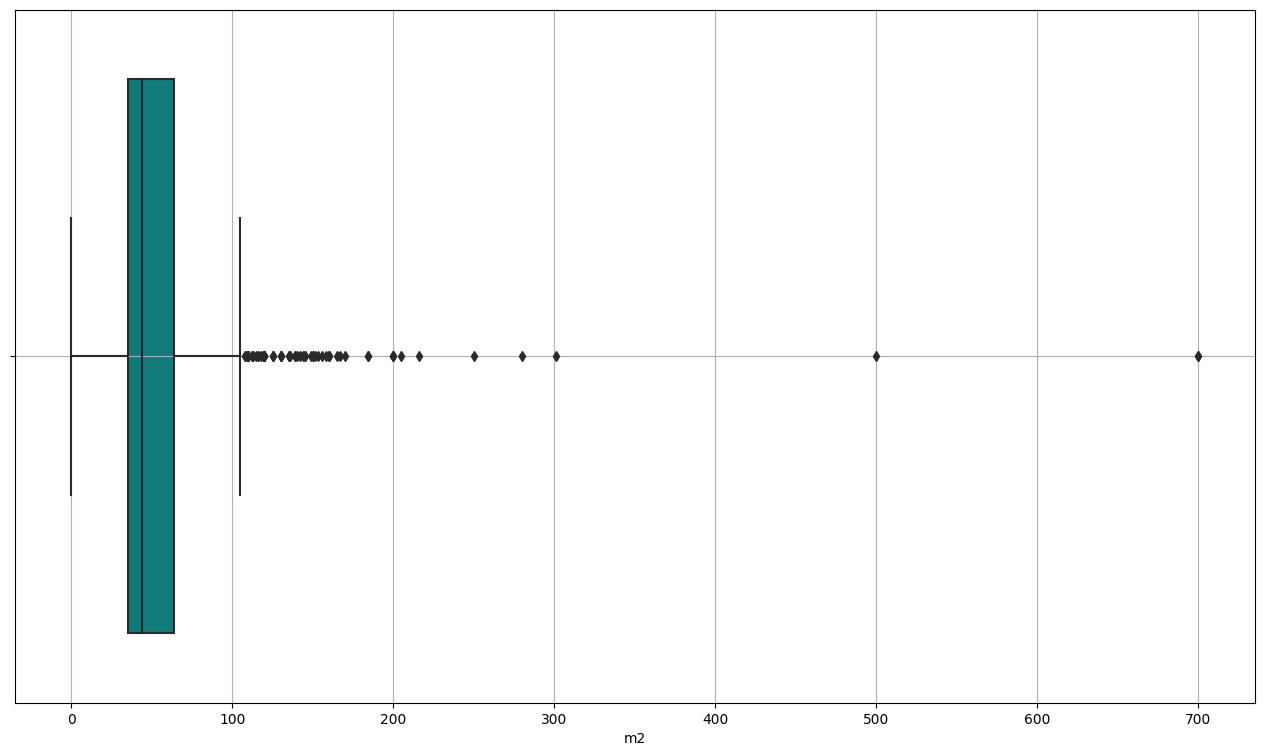

In [9]:
# Renderizamos el gráfico utilizando el diagrama de cajas
#df_ars.boxplot(column=['m2'])

# Se crea el espacio para dibujar con fig = plt.figure(figsize=(16, 9))
# Se crea el espacio para el gráfico
# sns alias Seaborn
# accede al método boxplot(), donde se le indica los valores a representar en el eje de las x, en este caso, 
# los valores de la columna m2
# ax=ax, es un objeto Axes sobre el que se dibuja el gráfico; de lo contrario, utiliza los ejes actuales.
# ax.grid('dashed') para ver la grilla de fondo especificando el color

fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot()
sns.boxplot(x=df_ars['m2'], ax=ax, color='darkcyan')
ax.grid('dashed')

Se puede observar que hay muchos alquileres "outliers", es decir que se escapan de la tendencia. Filtraremos aquellos que no aportan al análisis

In [10]:
# Nos quedamos solamente con los deparamentos menor a 200m2 y mayor a 50m2
# Utilizamos el concepto de "máscara" tal cual fue visto en Numpy
# para filtrar el dataframe de propiedads deseado
propiedades = df_ars[(df_ars['m2'] < 200) & (df_ars['m2'] > 50)]

In [11]:
print('Cantidad de datos en observacion:', propiedades.shape[0])

Cantidad de datos en observacion: 323


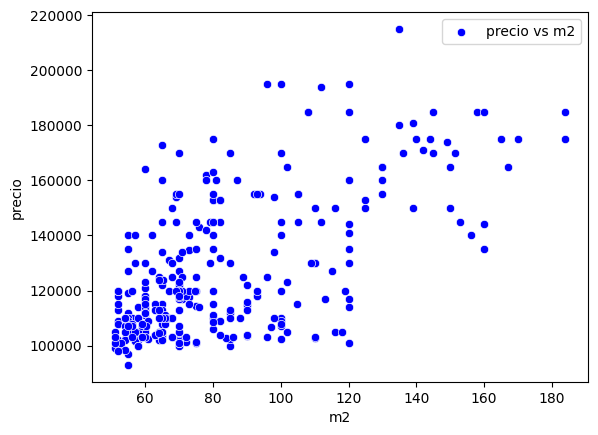

In [12]:
# Graficar la tendencia
sns.scatterplot(x=propiedades['m2'], y=propiedades['precio'], color='b', label='precio vs m2')
plt.show()

# Entrenar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline4.png" width="1000" align="middle">

El primer paso es obtener los datos que serán la entrada del sistema (X) y los datos que serán la salida del modelo estimador (y)

In [13]:
# Para los valores de X se emplea doble corchete porque necesita la matriz en dos dimensiones
X = propiedades[['m2', 'ambientes']].values

# Para los valores de y se emplea un corchete porque necesita la matriz en una dimensiones
y = propiedades['precio'].values

Siguiente paso es dividir el dataset en entrenamiento (train) y evaluación (test). Utilizaremos el criterio 70%30%

In [14]:
# Se importa la herramienta de sklearn.model_selectionl como train_test_split
from sklearn.model_selection import train_test_split

# Fijamos un "random_state" constante para que siempre el dataset se parta de la misma forma
# para poder repetir los ensayos
# Ojo! Los dataset de train y test son array numpy
# Se importa la herramienta de la libreria  train_test_split()
# Necesita los valores de X e y
# test_size=0.3, permite indicar el porcentaje de valores para evaluar, equivalente a un 30%
# random_state=42,  es un número fijo que utilizan comunmente en documentación, significa que para cada ejecución del algoritmo se genere nuevos valores aleatorios
# y los conjuntos de datos de entrenamiento y pruebas serán diferentes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Crear un modelo de regresión multilineallineal

In [15]:
# Se importa la herramienta de sklearn.linear_model como LinearRegression
from sklearn.linear_model import LinearRegression

# Se crea el objeto lr a partir que significa Regresión lineal a partir de la clase LinearRegression()
lr = LinearRegression()


# Del objeto lr se puede acceder al método fit con la notación del punto
# Necesita los valores de X haciendole un ajuste con reshape para que haga el entrenamiento junto a los 
# valores de y
lr.fit(X_train, y_train)

# Luego del objeto lr se puede acceder al método predict() que se encarga de hacer las precciones para cada
# valor de X
y_hat= lr.predict(X_test)

# Validar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline5.png" width="1000" align="middle">

In [16]:
# Es un coeficiente de determinación, determina la capacidad de un modelo para predecir futuros resultados. 
# El mejor resultado posible es 1.0
# Fuente: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html
# Se importa la herramienta de sklearn.metrics como r2_score
from sklearn.metrics import r2_score

# En este caso, ya que se trata de una regresión lineal puedo relacinonar el
# índice R2 con el coeficiente de correlación lineal.
 # value:.2f --> :.2f, significa que tendrá dos decimales
value = r2_score(y_test, y_hat)
print(f"Coeficiente de determinación: {value:.2f}")

Coeficiente de determinación: 0.40


# Utilizar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline6.png" width="1000" align="middle">

In [17]:
# Modelo de Regresión Multilineal
# El array debe tener [['m2', 'ambientes']]
m2 = np.array([[100, 4]])
y_hat_prueba = lr.predict(m2)
y_hat_prueba

array([131874.07778094])

# Conclusión
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline7.png" width="1000" align="middle">

En este ejemplo de propiedades se puede notar que agregar más variables/features en consideración que estén vinculados con la salida (target, precio) puede mejorar el modelo, pero como también no. Lo importante es armar los modelos lineal y multilineal para comparar resultados. Buscando la mejor opción en cuánto a valor final determinado por las métricas.